Notes:
 - [Image Classification](https://developers.google.com/machine-learning/practica/image-classification)
 - [TensorFlow Tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.signal
import keras


Load data

In [2]:
data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

print(data1.shape)
print(sprites1.shape)

selected_labels = data1[:894]
selected_labels = np.delete(selected_labels, slice(244, 543), axis=0)
print(selected_labels.shape)

selected_sprites = sprites1[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)


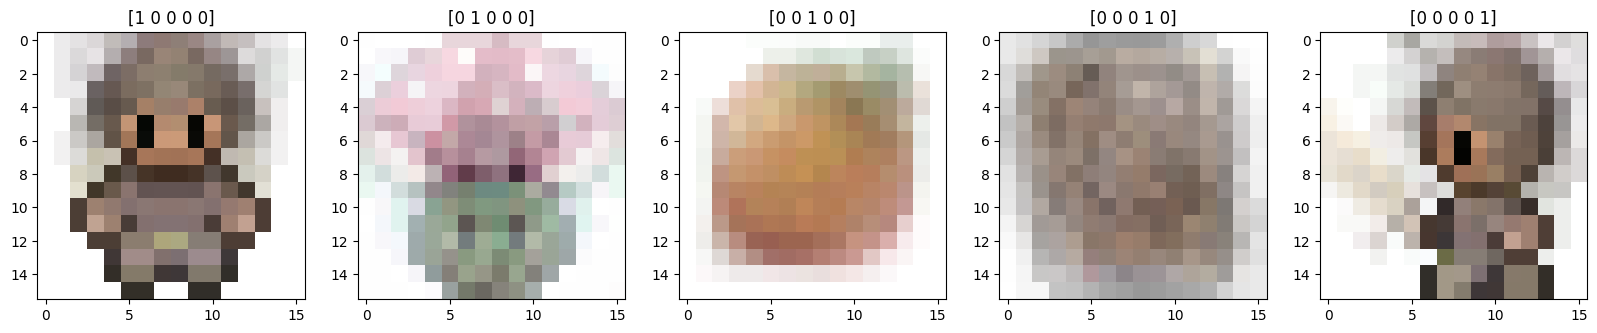

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))

labels = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]])

for i in range(5):
    mask = np.all(selected_labels == labels[i], axis=1)
    average = np.sum(selected_sprites[mask], axis=0) / np.sum(mask)
    average /= 255
    
    ax[i].imshow(average)
    ax[i].set_title(str(labels[i]))

In [16]:
from sklearn.model_selection import train_test_split

X = selected_sprites
y = selected_labels

X = X.astype(np.float32) / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(16, 16, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
]);

c:\Users\vegeo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
predictions = model(X_train[:1]).numpy()
print(predictions)

[[0.11918866 0.07805464 0.7193237  0.03889473 0.04453829]]


In [58]:
tf.nn.softmax(predictions).numpy()

array([[0.17752598, 0.17037177, 0.3235171 , 0.16382897, 0.16475618]],
      dtype=float32)

In [59]:
loss_fn = keras.losses.CategoricalCrossentropy()

In [61]:
loss_fn(y_train[:1], predictions).numpy()

0.3294438

In [62]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4526 - loss: 1.6319
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7444 - loss: 0.7848
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8337 - loss: 0.5496  
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.4455 
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8900 - loss: 0.3264
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8940 - loss: 0.3259
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9009 - loss: 0.2672
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9414 - loss: 0.1880
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9192 - loss: 0.2443
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9286 - loss: 0.1803


In [64]:
model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - 85ms/step - accuracy: 0.9580 - loss: 0.1292


[0.12915141880512238, 0.9579831957817078]

In [65]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.15577671, 0.15675192, 0.33993873, 0.19158143, 0.1559512 ],
       [0.15627594, 0.15834446, 0.33576295, 0.19335532, 0.15626132],
       [0.14887293, 0.14889793, 0.14891711, 0.40443096, 0.14888115],
       [0.14888631, 0.14893651, 0.1489476 , 0.40432733, 0.14890231],
       [0.15991257, 0.22786026, 0.16543354, 0.28696293, 0.15983064]],
      dtype=float32)>

In [87]:
import ipywidgets as widgets
label_names = ['Character (FORWARD)', 'Monster', 'Food', 'Item', 'Character (SIDE)']
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description='Image index:')
def show_image(index):
    plt.imshow(X_test[index])
    plt.show()
    prediction = probability_model(X_test[index:index+1]).numpy()
    print(f'Predicted label: {np.argmax(prediction)} ({label_names[np.argmax(prediction)]})')
    print(f'Actual label: {np.argmax(y_test[index])} ({label_names[np.argmax(y_test[index])]})')
    print('Predicted probabilities:')
    print(f'    Character (FORWARD): {'%.2f' % (prediction[0][0] * 100)}%')
    print(f'    Monster:             {'%.2f' % (prediction[0][1] * 100)}%')
    print(f'    Food:                {'%.2f' % (prediction[0][2] * 100)}%')
    print(f'    Item:                {'%.2f' % (prediction[0][3] * 100)}%')
    print(f'    Character (SIDE):    {'%.2f' % (prediction[0][4] * 100)}%')
widgets.interactive(show_image, index=index_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=118), Output()), _dom_classes=('widge…